# <font color="red">Lead Scoring Case Study</font>
#### Problem Statement : 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Steps involved in process:-
1. <b>Importing and understanding the data</b>
2. <b>Cleaning the data</b>
3. <b>Preparation of data for creating the model</b>
4. <b>Model Building/Creation</b>
5. <b>Model Evaluation and Making the predictions on test dataset</b>

# 1. Importing and understanding the data

In [1]:
# Importing the necessary libararies adnd imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries used for building model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Lets import Logistic regression from Scikit learn
from sklearn.linear_model import LogisticRegression
# Import RFE
from sklearn.feature_selection import RFE
# Importing statsmodels
import statsmodels.api as sm
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


In [2]:
# Reading the dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the shape of the dataset
leads.shape

(9240, 37)

In [4]:
# Checking the nulls and non null values
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<b><font color="brown">Inference:- </font> </b><br></br>
<font color="blue">As we can see there are few coulmns which has many null values, like - Lead Quality, Tags etc..</font>

In [5]:
# Checking all the column names
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads["Converted"].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

# 2. Cleaning the data

## 2.1 Checking for nulls

In [8]:
# Checking the null counts
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Checking the null counts in percentage
((leads.isnull().sum()/len(leads)) * 100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

<b><font color="brown">Inference:- </font> </b><br></br>
- <font color="blue">As we can see there are few coulmns which has many null values. We have the dataset of size 9000 appx. Hence anything greater than 30% null values will not add much value to the model. Hence we drop all the columns with missig values > 30%</font>

In [10]:
# dropping the columns which has null perc > 30
leads.drop(labels=["Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Score","Asymmetrique Activity Score",
                   "Asymmetrique Profile Index","Tags"], axis=1, inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


#### Further checking on the features which are important for our model building.
- We see that, "Prospect ID" and "Lead Number" are just a count of values(row numbers) hence this column can be dropped.
<!-- - We also see that, Lead Source has value which are very similar to Lead Origin feature. Hence we will be removing the Lead Origin (the Latter) to prevent the redundancy. -->
- Going further we could see that, Last activity and Last Notable activity were having very similar kind of data. Hence removing the latter one (Last Notable activity) to prevent the redundancy in the data
- "Country" does not add any good insight to the present data hence we will be removing it. Since X-Education is offering online courses, Country attribute would be relevant only for pricing. Since the case study is about lead conversion, we could remove it.

#### "Newspaper" has value which are very similar to "Newspaper Article" feature. Hence we will be removing the "Newspaper Article" (the Latter) to prevent the redundancy.

In [11]:
leads.drop(labels=["Prospect ID","Lead Number","Last Notable Activity"
                   ,"Country","Newspaper Article"],axis=1,inplace=True)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,Select,Select,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,Select,Select,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Select,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,Select,Mumbai,No,No


#### Some of the categorical variable has a value called "Select". This is present becuase when the form sent out to the users, because these column field were not mandotory, some user didnot fill anything and hence by default the Select value placeholder is taken up as a value, mistakenly. Hence it is required to handle these columns and convert these values into nulls as the Select value represent = No value present

In [12]:
# Checking the Lead Profile,How did you hear about X Education and City field  which has Select as a value
leads["Lead Profile"].value_counts(normalize=True) * 100

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

In [13]:
# Checking the Lead Profile,How did you hear about X Education which has Select as a value
leads["How did you hear about X Education"].value_counts(normalize=True) * 100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

<b><font color="brown">Inference:- </font> </b><br></br>
- <font color="blue">A large chunck of data present in "Lead Profile", "How did you hear about X Education" are Select which is almost 64 and 71 perc respectively hence we will drop these columns</font>

In [14]:
# dropping "Lead Profile", "How did you hear about X Education" 
leads.drop(labels=["Lead Profile", "How did you hear about X Education"],axis=1,inplace=True)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,No,Select,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,No,Select,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,No,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,No,Mumbai,No,No


In [15]:
# Lets check the shape once
leads.shape

(9240, 24)

In [16]:
# Checking the City field which also has Select as a value
leads["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

<b><font color="brown">Inference:- </font> </b><br></br>
- <font color="blue">A large chunck of data present in "City" columns has "Select".</font>
- <font color="blue">Hence converting "Select" to "Nulls"</font>

In [17]:
def convertSelect(X):
    if(X == "Select"):
        return np.nan
    else:
        return X

In [18]:
leads["City"] = leads["City"].apply(convertSelect)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,No,NaN,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,No,NaN,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,No,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,No,Mumbai,No,No


#### Checking the null value again

In [19]:
# Checking the null counts in percentage
leads.isnull().sum().sort_values(ascending=False)

City                                             3669
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Digital Advertisement                               0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Search                                              0
Newspaper                                           0
X Education Forums                                  0
Magazine                    

In [20]:
# Checking the null counts in percentage
((leads.isnull().sum()/len(leads)) * 100).sort_values(ascending=False)

City                                             39.707792
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Search                                            0.000000
Newspaper                                         0.0000

#### As we can see the city has around 40% missing values, hence it would be better if we remove it.

In [21]:
# Removing the City which has null > 30%
leads.drop("City",axis=1,inplace=True)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,No,No,No,No


__Even though -> "What matters most to you in choosing a course,What is your current occupation, Specialization, TotalVisits" columns have significant missing values, we are not dropping the rows. Instead we are creating a category called Missing / Others__

__Firtsly we will check Lead source column. Here Google is the most common search engine as seen from the value counts. Hence this is used as an imputing factor for th nulls values__

In [22]:
# 1. Lead source
leads['Lead Source'].isnull().sum()

36

In [23]:
leads['Lead Source'] = leads['Lead Source'].replace(np.NaN,'Google')

print(leads['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', leads['Lead Source'].isna().sum())
print('=================================================================')

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 0


__From the value counts we can see that, there are many sources from which leads can land on to X_Education website. It can be seen that from Facebook onwards these are in double and single digit counts. Hence they are all grouped as other sources group__

In [24]:
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

print(leads['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', leads['Lead Source'].isna().sum())
print('=================================================================')

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 0


__Similarly specilization also has multiple parameters/values.While all these values are important to retain we will be imputing the missing values into a new category called "Missing"__

In [25]:
# 2. 'Specialization


print(leads['Specialization'].value_counts())
print('-----------')
print('Missing values count --->', leads['Specialization'].isna().sum())
print('=================================================================')

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
-----------
Missing values count ---> 1438


__As we can see from the above, there is a large chunck of "Select" which is actually null values. Which should be converted to nulls__

In [26]:
# Lets convert the Select into NaN
leads["Specialization"] = leads["Specialization"].apply(convertSelect)
print(leads['Specialization'].value_counts())
print('-----------')
print('Missing values count --->', leads['Specialization'].isna().sum())
print('=================================================================')

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
-----------
Missing values count ---> 3380


In [27]:
# replacing missing values with label 'Missing'

leads['Specialization'] = leads['Specialization'].replace(np.NaN,'Missing')
leads['Specialization'].value_counts()

Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

__Similarly specilization also has multiple parameters/values.While all these values are important to retain we will be imputing the missing values into a new category called "Missing"__

In [28]:
# 3. 'What is your current occupation'

print(leads['What is your current occupation'].value_counts())
print('-----------')
print('Missing values count --->', leads['What is your current occupation'].isna().sum())
print('=================================================================')

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
-----------
Missing values count ---> 2690


In [29]:
# replacing missing values with label 'Missing'

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN,'Missing')
leads['What is your current occupation'].value_counts()

Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

__Similarly 'What matters most to you in choosing a course' also has multiple parameters/values.While all these values are important to retain we will be imputing the missing values using mode__

In [30]:
# 4. 'What matters most to you in choosing a course'

print(leads['What matters most to you in choosing a course'].value_counts())
print('-----------')
print('Missing values count --->', leads['What matters most to you in choosing a course'].isna().sum())
print('=================================================================')

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
-----------
Missing values count ---> 2709


In [31]:
leads["What matters most to you in choosing a course"].fillna(leads["What matters most to you in choosing a course"].mode()[0],inplace=True)
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

__Similarly 'Last Activity' also has multiple parameters/values.While all these values are important to retain we will be imputing the missing values using mode__

In [32]:
# 5. 'Last Activity'

print(leads['Last Activity'].value_counts())
print('-----------')
print('Missing values count --->', leads['Last Activity'].isna().sum())
print('=================================================================')

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64
-----------
Missing values count ---> 103


In [33]:
leads["Last Activity"].fillna(leads["Last Activity"].mode()[0],inplace=True)
leads["Last Activity"].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

__Similarly 'TotalVisits' also has multiple parameters/values.While all these values are important to retain we will be imputing the missing values using mean__

In [34]:
# 6. 'TotalVisits'

print(leads['TotalVisits'].value_counts())
print('-----------')
print('Missing values count --->', leads['TotalVisits'].isna().sum())
print('=================================================================')

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64
-----------
Missing values count ---> 137


In [35]:
leads["TotalVisits"].fillna(leads["TotalVisits"].mean(),inplace=True)
leads["TotalVisits"].value_counts()

0.000000      2189
2.000000      1680
3.000000      1306
4.000000      1120
5.000000       783
6.000000       466
1.000000       395
7.000000       309
8.000000       224
9.000000       164
3.445238       137
10.000000      114
11.000000       86
13.000000       48
12.000000       45
14.000000       36
16.000000       21
15.000000       18
17.000000       16
18.000000       15
20.000000       12
19.000000        9
23.000000        6
21.000000        6
24.000000        5
27.000000        5
25.000000        5
22.000000        3
28.000000        2
29.000000        2
26.000000        2
115.000000       1
41.000000        1
55.000000        1
32.000000        1
141.000000       1
54.000000        1
42.000000        1
251.000000       1
74.000000        1
43.000000        1
30.000000        1
Name: TotalVisits, dtype: int64

In [36]:
leads["TotalVisits"]=round(leads["TotalVisits"],2)
leads["TotalVisits"].head(10)

0    0.0
1    5.0
2    2.0
3    1.0
4    2.0
5    0.0
6    2.0
7    0.0
8    2.0
9    4.0
Name: TotalVisits, dtype: float64

__Similarly 'Page Views Per Visit' also has multiple parameters/values.While all these values are important to retain we will be imputing the missing values using mean__

In [37]:
# 7. 'Page Views Per Visit
print(leads['Page Views Per Visit'].value_counts())
print('-----------')
print('Missing values count --->', leads['Page Views Per Visit'].isna().sum())
print('=================================================================')

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64
-----------
Missing values count ---> 137


In [38]:
leads["Page Views Per Visit"].fillna(leads["Page Views Per Visit"].mean(),inplace=True)
leads["Page Views Per Visit"].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
         ... 
2.57        1
12.33       1
2.29        1
1.48        1
14.50       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [39]:
# Checking the null count again
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

<b><font color="brown">Inference:- </font> </b><br></br>
<font color="blue">We have sucessfully removed all the null values</font>

In [40]:
leads.shape

(9240, 23)

## 2.2 Checking for outliers

In [41]:
# Lets check the datatype and null count once
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

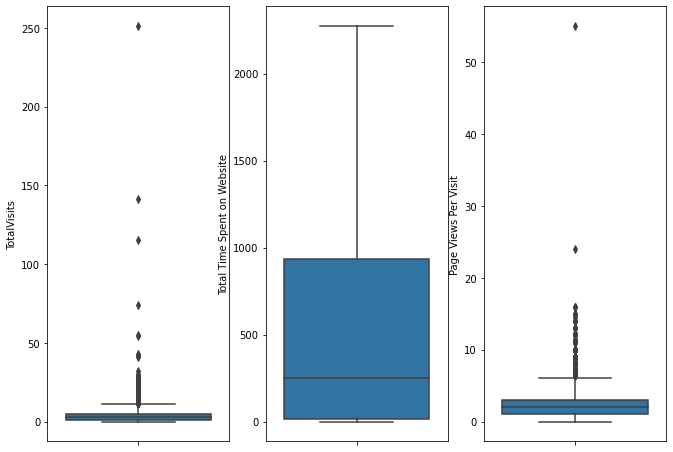

In [42]:
# Plotting a boxplot to check outliers
cols = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit'] # 3 independent continous variables

plt.figure(figsize=(15,8))
i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col,data=leads)
    i += 1

#### From the above boxplots, we could infer the following:-
1. Totalvisits greater than 50 would definetly corresponds to unsual activity. We can see there are few users who have visted more than 250 times which could be an unusual traffic caused by bots. Hence We can remove those values which are having Totalvisits > 50.
2. Similarly Page Views per Visit has one unusual value greater than 50 which is very high and could be caused by bots. Hence we take a cutoff of anything above 20 as unusual traffic and we remove it


In [43]:
# Removing the outlier from TotalVisits
leads = leads[~(leads["TotalVisits"] > 50)]
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Missing,...,No,No,No,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Missing,...,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Missing,...,No,No,No,No,No,No,No,No,No,No


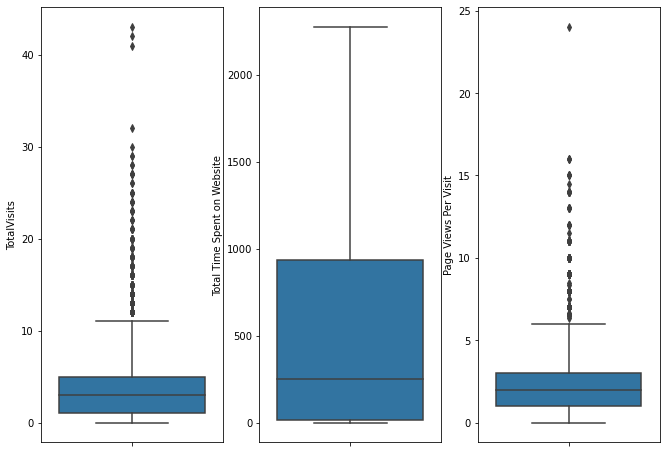

In [44]:
# Plotting outlier curves again to check
cols = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit'] # 3 independent continous variables

plt.figure(figsize=(15,8))
i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col,data=leads)
    i += 1

#### After we remove the outlier of Totalvisits > 50. We saw that it alos handled the outlier case of "Page Views Per Visit". Now the data seems to be good for EDA and model building

In [45]:
# Lets check the shape
leads.shape

(9234, 23)

## 2.3 Standardizing the columns

#### Lets Standardize the "total time spent on website" column which has values represented in minutes, to hours

In [46]:
# Converting the minute value into hours
leads["Total Time Spent on Website"] = round(leads["Total Time Spent on Website"].apply(lambda x : x/60),2)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0.00,0.0,Page Visited on Website,Missing,...,No,No,No,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,11.23,2.5,Email Opened,Missing,...,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,25.53,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,5.08,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,23.80,1.0,Converted to Lead,Missing,...,No,No,No,No,No,No,No,No,No,No


## 2.4 EDA

### 2.4.1 Univarate analysis of Categorical variables

In [47]:
# Checking all the categorical variables
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9234 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9234 non-null   object 
 1   Lead Source                                    9234 non-null   object 
 2   Do Not Email                                   9234 non-null   object 
 3   Do Not Call                                    9234 non-null   object 
 4   Converted                                      9234 non-null   int64  
 5   TotalVisits                                    9234 non-null   float64
 6   Total Time Spent on Website                    9234 non-null   float64
 7   Page Views Per Visit                           9234 non-null   float64
 8   Last Activity                                  9234 non-null   object 
 9   Specialization                                 9234 

In [48]:
# Taking only the object datatype (categorical)
objects = pd.DataFrame(leads.dtypes == "object")
objects.reset_index(inplace=True)
objects.columns = ["objects", "Values"]
objects["objects"]

0                                       Lead Origin
1                                       Lead Source
2                                      Do Not Email
3                                       Do Not Call
4                                         Converted
5                                       TotalVisits
6                       Total Time Spent on Website
7                              Page Views Per Visit
8                                     Last Activity
9                                    Specialization
10                  What is your current occupation
11    What matters most to you in choosing a course
12                                           Search
13                                         Magazine
14                               X Education Forums
15                                        Newspaper
16                            Digital Advertisement
17                          Through Recommendations
18           Receive More Updates About Our Courses
19          

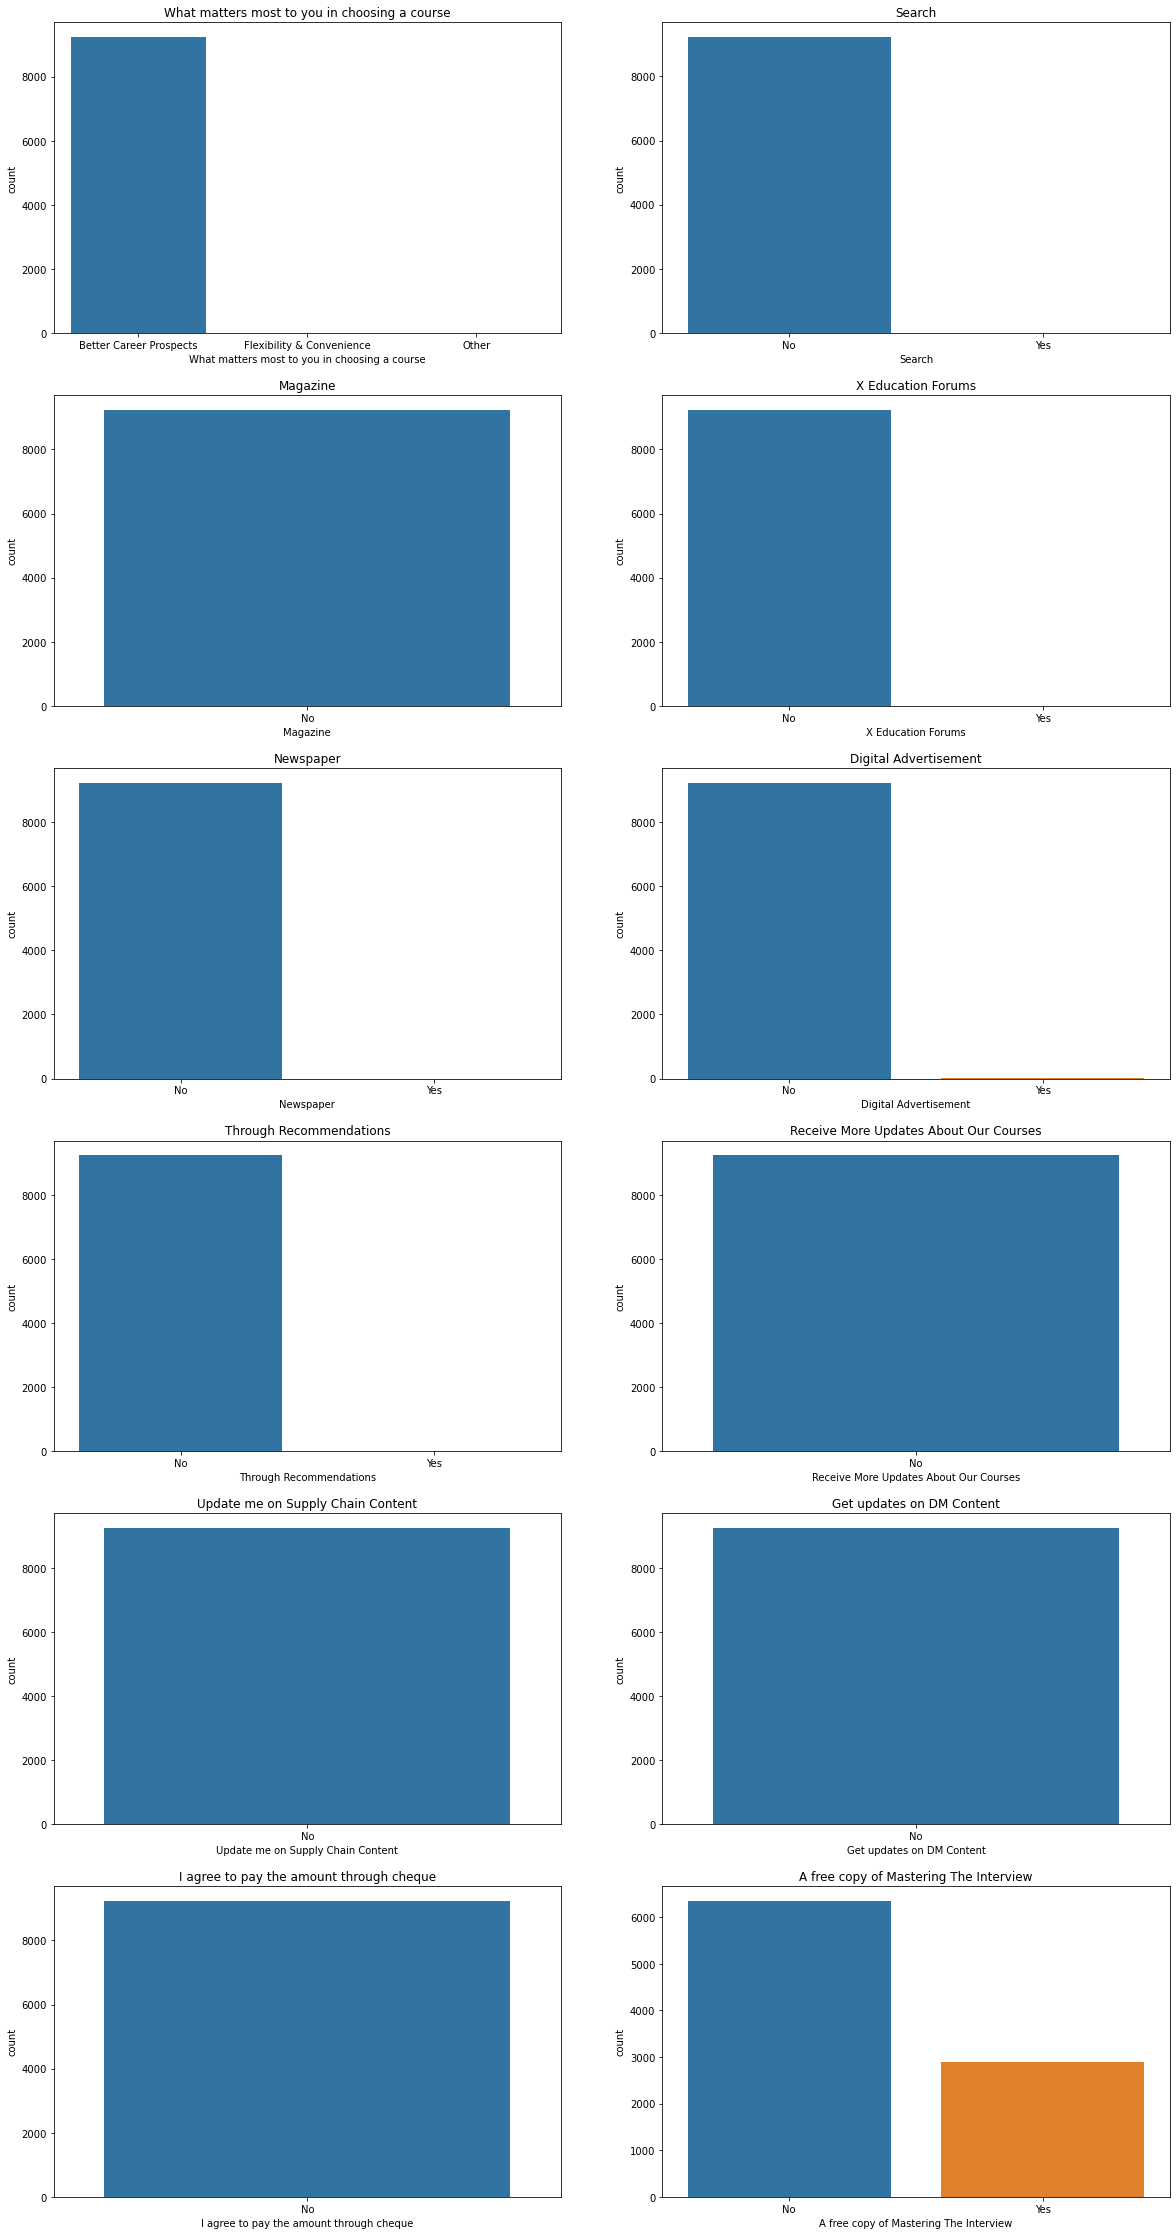

In [49]:
# Plotting Categorical variables as subplots (only binary)
cols = ["What matters most to you in choosing a course",
                                          "Search",
                                         "Magazine",
                               "X Education Forums",
                                        "Newspaper",
                            "Digital Advertisement",
                          "Through Recommendations",
           "Receive More Updates About Our Courses",
                "Update me on Supply Chain Content",
                        "Get updates on DM Content",
         "I agree to pay the amount through cheque",
           "A free copy of Mastering The Interview"]

plt.figure(figsize = (20,40))

i = 1
for col in cols:
    plt.subplot(6,2,i)
    sns.countplot(leads[col])
    plt.title(col)
    i += 1

<b><font color="brown">Inference:- </font> </b><br></br>
<font color="blue">From the above binary varible plots, we can infer:-
- Most leads are working professionals who wish for better career prospects. 
- Most of the leads are not willing to get promotions or contacted through mail about future courses.
- More than 50% of the people wanted a free copy of mastering the interview book. 
- Prospective leads were more comfortable with other modes payment than cheque payment. 
- Most of the leads generated were through X education forum, website,newspaper, through google search engine, recommendations and digital advertisements. 
- Least or no leads were generated through magazines. 
- 90% of the prospective leads opted for no mails and calls , despite enquiring on the website. 
</font>

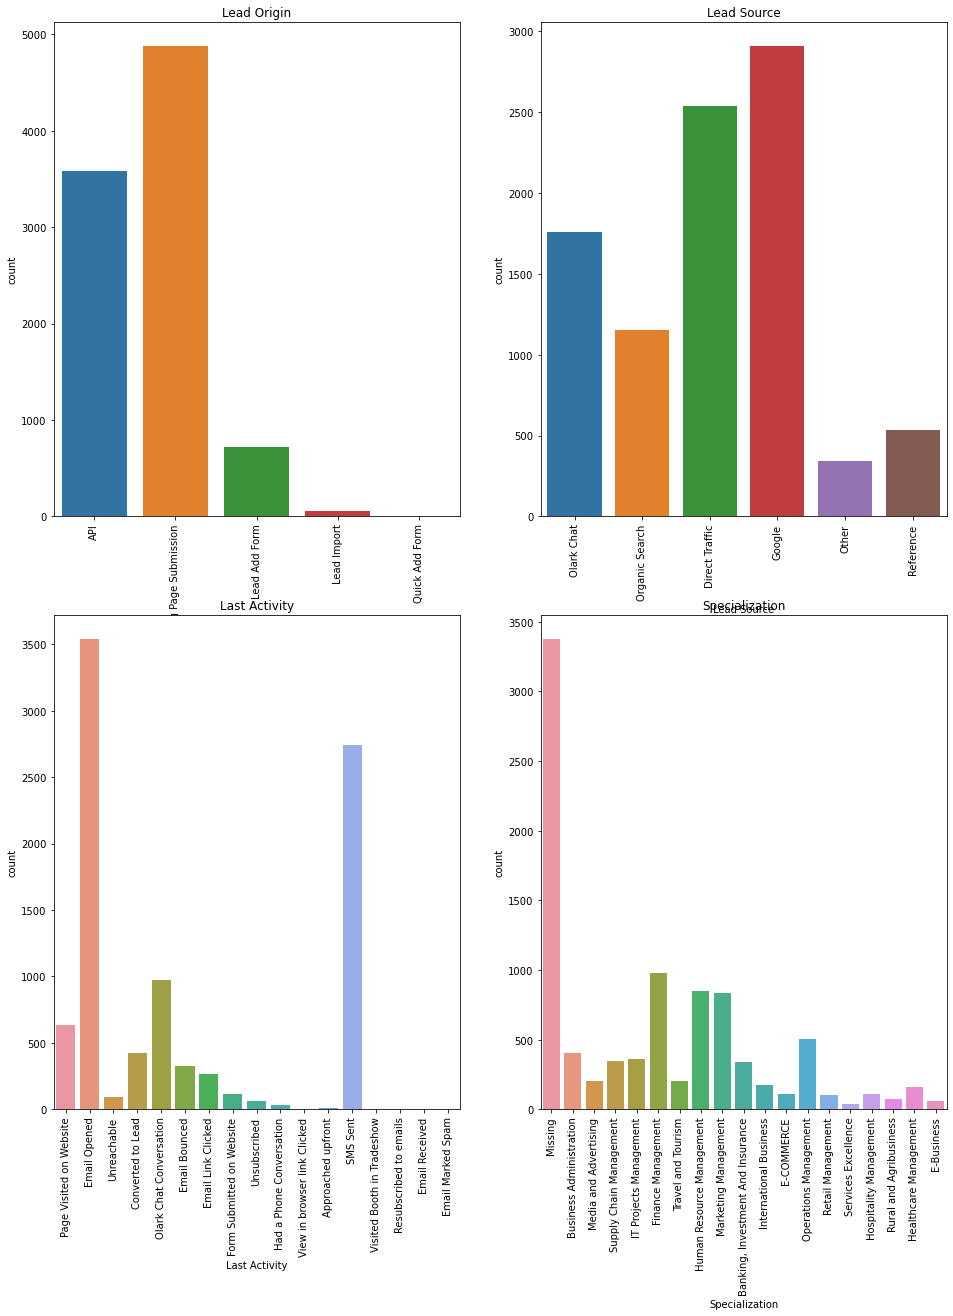

In [50]:
# Plotting Categorical variables as subplots (multiparamter)
cols = [  "Lead Origin",
          "Lead Source",
          "Last Activity",
          "Specialization"]
i = 1
plt.figure(figsize = (16,20))

for col in cols:
    plt.subplot(2,2,i)
    sns.countplot(leads[col]).tick_params(axis='x', rotation = 90)
    plt.title(col)
    i += 1

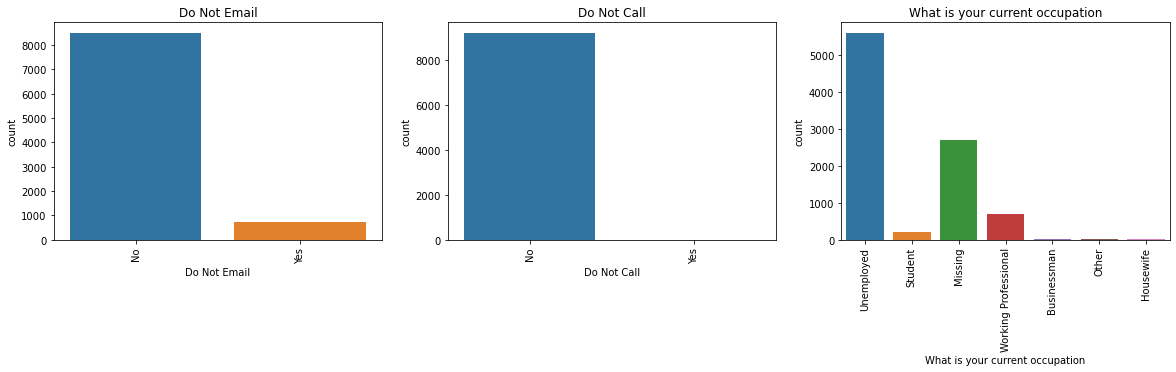

In [51]:
# Plotting Categorical variables as subplots (multiparamter)
cols  =   ["Do Not Email", 
          "Do Not Call",          
         "What is your current occupation"]
    
i = 1
plt.figure(figsize = (20,4))

for col in cols:
    plt.subplot(1,3,i)
    sns.countplot(leads[col]).tick_params(axis='x', rotation = 90)
    plt.title(col)
    i += 1

<b><font color="brown">Inference:- </font> </b><br></br>
<font color="blue">From the above binary varible plots, we can infer:-
- Most leads originated from APIs and forms submitted through X Education website. 
- Google search engine is the most common lead source, followed by direct traffic (url) of the website. 
- The sales team had contacted most of the generated leads via mail and through SMS. These seem to be the leads which are labelled as hot leads and are considered to be most likely for conversion.
- Most of the leads have not specified the specialization course that they are looking for. This could be due lack of information or they must be simply browsing. 
- The highest percentage of prospective leads have mentioned their current occupation as unemployed. This category can be looked at as a possible source for increasing conversion.  


</font>

## 2.3.2 Univariate analysis with Numerical Variables

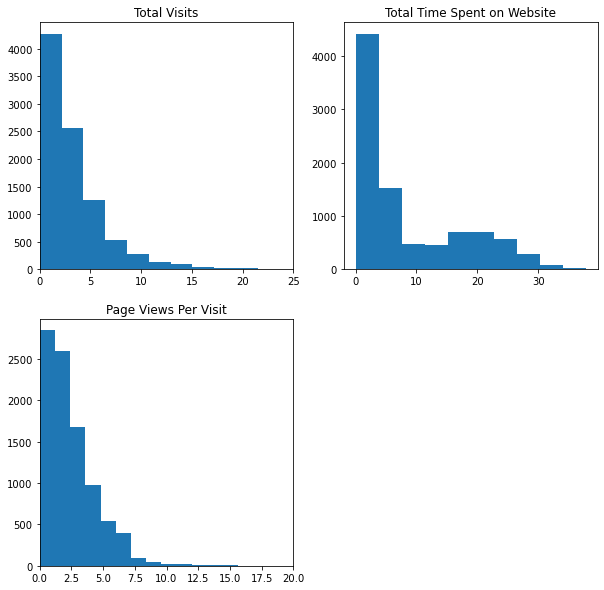

In [52]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads['TotalVisits'], bins = 20)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

<b><font color="brown">Inference:- </font> </b><br></br>
<font color="blue">We can infer the following:-
- Around 4000 to 6500 people made as little as 0 to 5 visits and have spent a maximum of 10 minutes on website. This can be correlated to the fact that X education gets a lot of leads from referrals, newspaper and digital advertisements. These would probably direct calls and not through website. 
- Maximum number of page views and time spent on the website is by 15 to 30 people maximum. 
</font>

In [53]:
['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

## 2.3.3 Bivariate analysis with Categorical variables and target variable

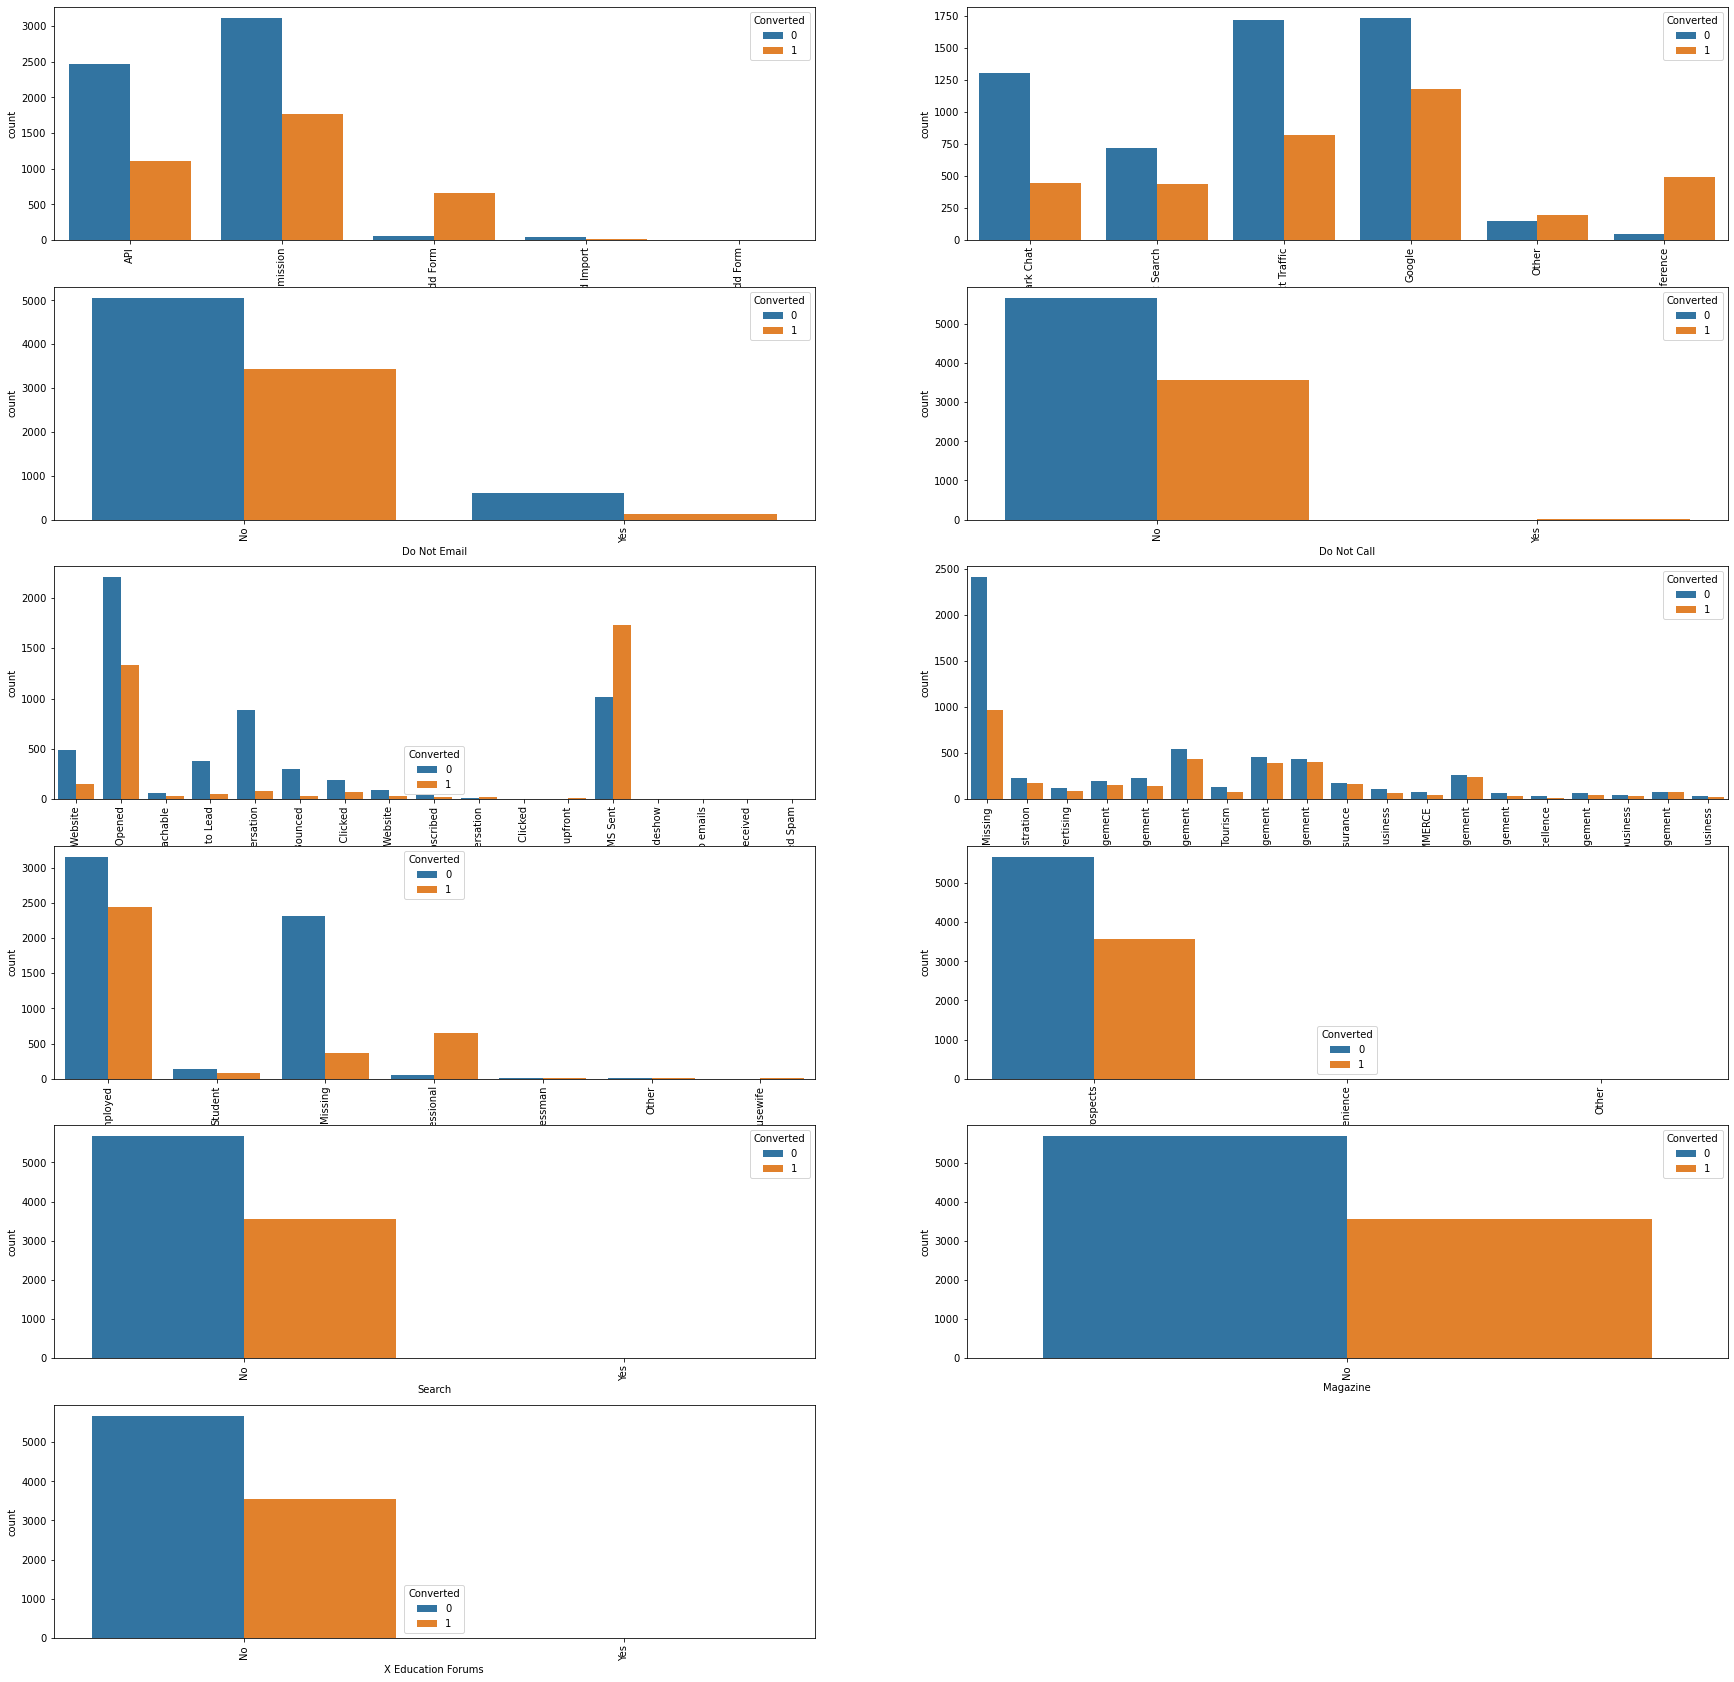

In [54]:
# Bivariate analysis with categorical features
plt.figure(figsize = (30,30))

cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'X Education Forums']
i=1
for col in cols:
    plt.subplot(6,2,i)
    sns.countplot(x=col, hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
#     plt.title(col)
    i += 1

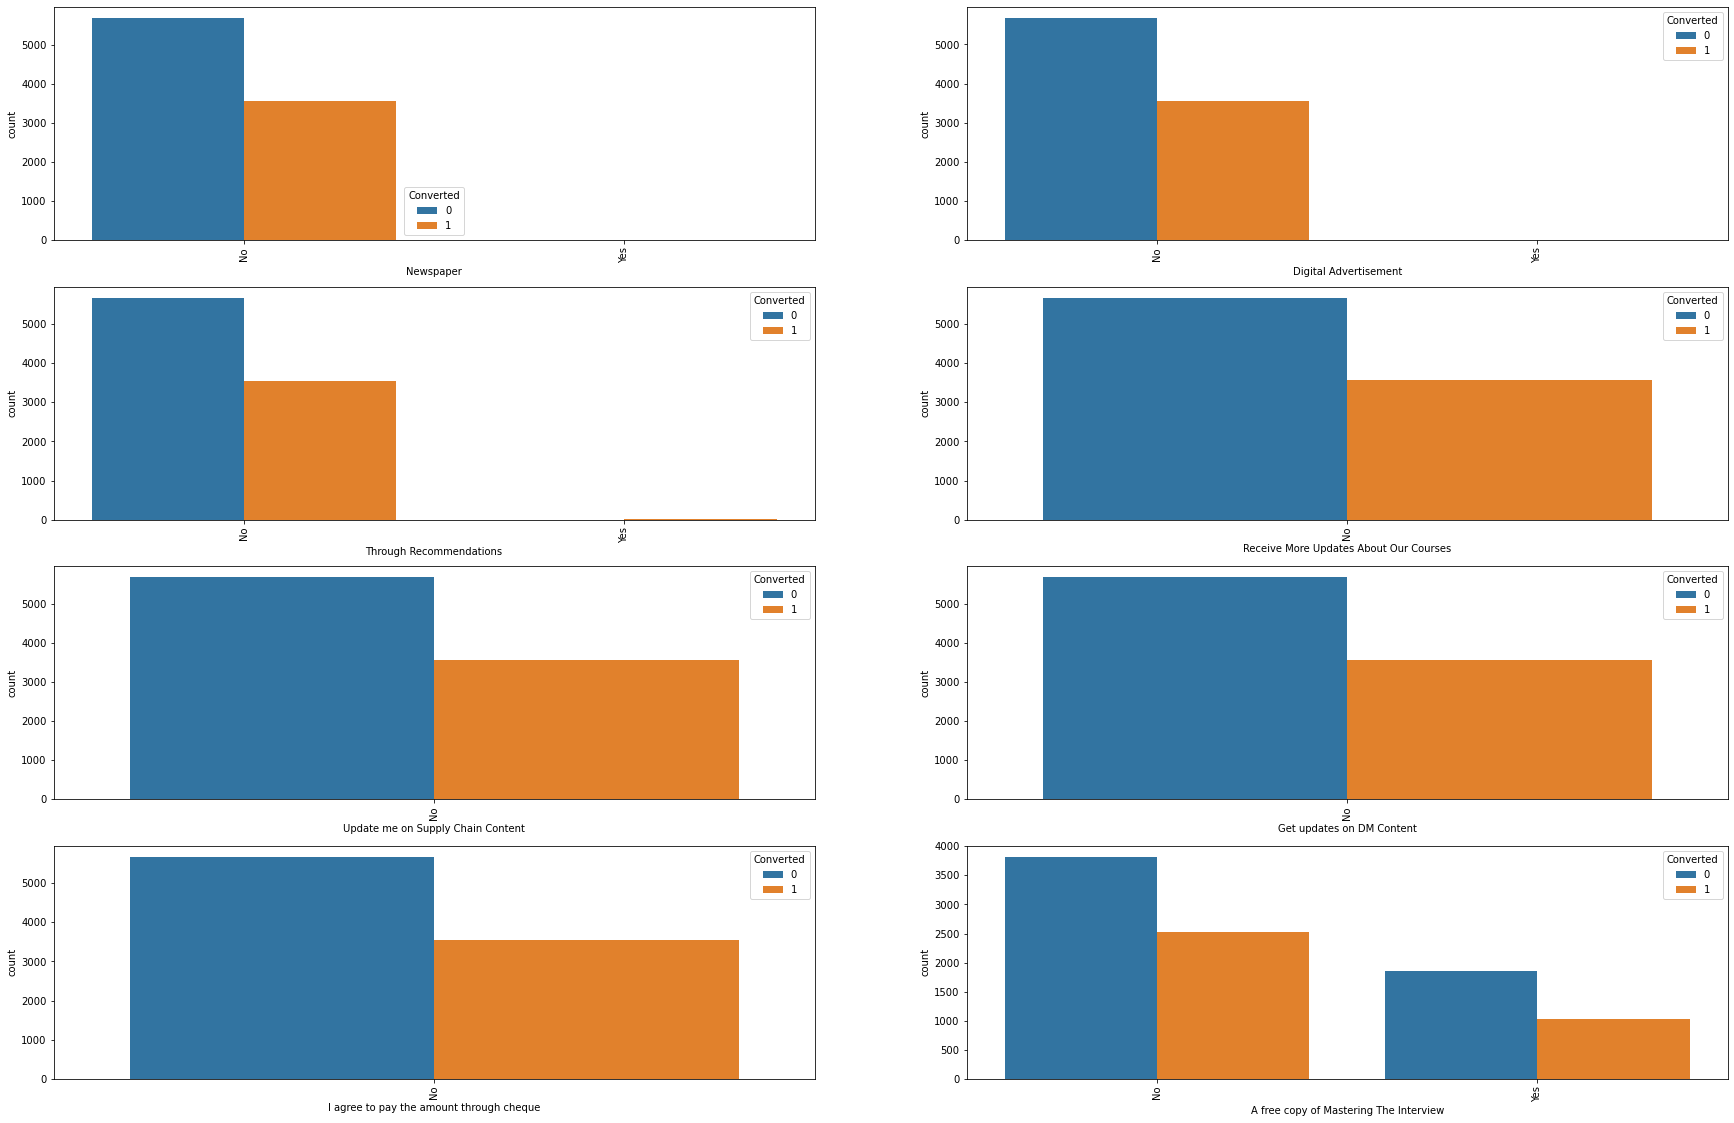

In [55]:
# Bivariate analysis with categorical features
plt.figure(figsize = (30,30))

cols1 = ['Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']
i=1
for col in cols1:
    plt.subplot(6,2,i)
    sns.countplot(x=col, hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
#     plt.title(col)
    i += 1

<b><font color="brown">Inference:- </font> </b><br></br>
<font color="blue">We can infer the follwing:-
- Lead Origin - More conversions are expected from form submission and direct website API than other modes of origin. 
- Lead Source - Most conversions happen through google source and direct traffic as can be inferred from the above lead origin column. 
- Leads who have opted for no mails and calls are not relevant to conversion rates. 
- Most leads who have opened the last email or phone conversations and sms sent have more conversions.
- Specifying the specialization course is not relevant to conversion. There are equal of number of leads who have not specified in positive converts.
- Most leads have opted to browse and convert belong to the category of better career prospects. 
- Marketing techniques through magazines have lower conversion compared to search engine and digital adverts. However, overall conversion rate wrt to marketing and sales techniques is only at 35% to 40%. 

</font>

## 2.3.4 Bivariate analysis with Numerical variables and target variable

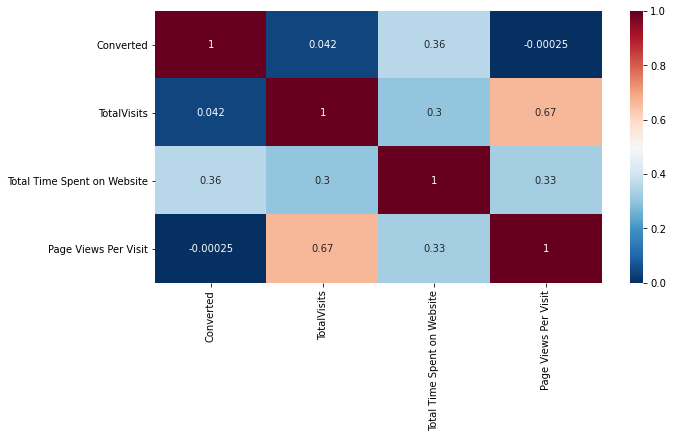

In [56]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr(),cmap="RdBu_r",annot=True)
plt.show()

<b><font color="brown">Inference:- </font> </b><br></br>
<font color="blue">We can infer the follwing:-
- Correlation map shows that page per views has high correlation with total visits, whereas time spent on website has a correlation factor of only .36 wrt to lead conversion. 
- It can therefore be inferred that time spent on website, while a good indicator does not necessarily mean interest and conversion in to enrollment.
</font>

## 2.3.5 Checking the balance in the target variable

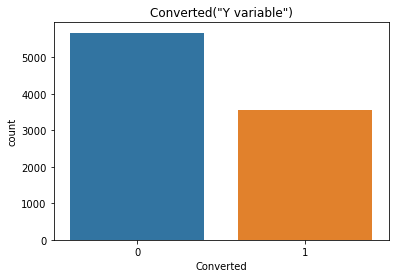

In [57]:
# check if there is an imbalance in target data
sns.countplot(leads['Converted'])
plt.title('Converted("Y variable")')
plt.show()

<b><font color="brown">Inference:- </font> </b><br></br>
<font color="blue"> From the above plot, we can infer that the target variable, "converted" is pretty balanced
as count of 0's and 1's are comparable</font>

# 3. Preparation of data for creating the model

## 3.1 Creating dummy variables

In [58]:
# Lets first check the datatypes
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9234 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9234 non-null   object 
 1   Lead Source                                    9234 non-null   object 
 2   Do Not Email                                   9234 non-null   object 
 3   Do Not Call                                    9234 non-null   object 
 4   Converted                                      9234 non-null   int64  
 5   TotalVisits                                    9234 non-null   float64
 6   Total Time Spent on Website                    9234 non-null   float64
 7   Page Views Per Visit                           9234 non-null   float64
 8   Last Activity                                  9234 non-null   object 
 9   Specialization                                 9234 

In [59]:
# Lets create the dummy variables for those which are non binary categorical columns
leads_df = pd.get_dummies(data=leads,columns=["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","What matters most to you in choosing a course"])
leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,X Education Forums,Newspaper,...,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,No,No,0,0.0,0.00,0.0,No,No,No,No,...,0,0,0,0,0,1,0,1,0,0
1,No,No,0,5.0,11.23,2.5,No,No,No,No,...,0,0,0,0,0,1,0,1,0,0
2,No,No,1,2.0,25.53,2.0,No,No,No,No,...,0,0,0,0,1,0,0,1,0,0
3,No,No,0,1.0,5.08,1.0,No,No,No,No,...,0,0,0,0,0,1,0,1,0,0
4,No,No,1,2.0,23.80,1.0,No,No,No,No,...,0,0,0,0,0,1,0,1,0,0


In [60]:
# # Lets drop the old variables which were used to create the dummies
# leads_df.drop(labels=["Lead Source","Last Activity",
#                       "Specialization","What is your current occupation","What matters most to you in choosing a course"],
#              axis=1)
# leads_df.head()

## 3.2 Converting the binary variable into its numerical counterparts

In [61]:
# Now lets convert the binary variable into its numerical counterparts
vari = ["Search","Magazine","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations",
       "Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content",
       "I agree to pay the amount through cheque","A free copy of Mastering The Interview","Do Not Email","Do Not Call"]

for var in vari:
    leads_df[var] = leads_df[var].map({'Yes': 1 ,'No': 0})

In [62]:
# Checking the updated dataset 
leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,X Education Forums,Newspaper,...,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0,0.0,0.00,0.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,5.0,11.23,2.5,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,2.0,25.53,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1.0,5.08,1.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,2.0,23.80,1.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [63]:
# leads_df.to_csv("example.csv")

## 3.3 Spliting the dataset into Train-test

In [64]:
# Check the shape of the dataset before the train-test split
leads_df.shape

(9234, 74)

In [65]:
# Firstly we will split the independent variable and dependent variable as X and y
# target variable Converted as y
y = leads_df.pop("Converted")

X = leads_df

# Creating the test-trSain dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [66]:
# Checking the X_test and y_test shape
X_test.shape,y_test.shape

((2771, 73), (2771,))

In [67]:
# Checking the X_train and y_train shape
X_train.shape,y_train.shape

((6463, 73), (6463,))

## 3.4 Standardizing the numerical values

In [68]:
## Lets check the numerical variables values before we standardize it
# Checking the Total Time Spent on Website
X_train["Total Time Spent on Website"].describe(percentiles=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    6463.000000
mean        8.121799
std         9.103322
min         0.000000
0%          0.000000
10%         0.000000
20%         0.000000
30%         0.950000
40%         2.470000
50%         4.170000
60%         6.250000
70%        11.858000
80%        18.092000
90%        22.978000
max        37.870000
Name: Total Time Spent on Website, dtype: float64

In [69]:
## Lets check the numerical variables values before we standardize it
# Checking the TotalVisits
X_train["TotalVisits"].describe(percentiles=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    6463.000000
mean        3.393881
std         3.442838
min         0.000000
0%          0.000000
10%         0.000000
20%         0.000000
30%         2.000000
40%         2.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         5.000000
90%         7.000000
max        32.000000
Name: TotalVisits, dtype: float64

In [70]:
## Lets check the numerical variables values before we standardize it
# Checking the Page Views Per Visit	
X_train["Page Views Per Visit"].describe(percentiles=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    6463.000000
mean        2.366603
std         2.062438
min         0.000000
0%          0.000000
10%         0.000000
20%         0.000000
30%         1.000000
40%         2.000000
50%         2.000000
60%         2.500000
70%         3.000000
80%         4.000000
90%         5.000000
max        24.000000
Name: Page Views Per Visit, dtype: float64

<b><font color="brown">Inference:- </font> </b><br></br>
<font color="blue"> From the above we can infer that, as there is two much of variation in the values.
We will do the Minmaxscaling for all the three numerical variables</font>

In [71]:
# Scaling the three numeric features
vars_num = ["Total Time Spent on Website","TotalVisits","Page Views Per Visit"]

# We use scalling (MinMax Scaling)
# Creating the object of MinMaxScaler()
scalar = MinMaxScaler()

# Fit and transform the training dataset
X_train[vars_num] = scalar.fit_transform(X_train[vars_num])

In [72]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,...,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
4804,0,0,0.0000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2649,1,0,0.0625,0.014523,0.083333,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9119,0,0,0.0625,0.334830,0.083333,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3067,0,0,0.1875,0.105096,0.250000,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8466,0,0,0.0625,0.695273,0.083333,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [73]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,...,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.0,6463.000000,6463.0,6463.000000,...,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.077054,0.000309,0.106059,0.214465,0.098608,0.001702,0.0,0.000155,0.0,0.000309,...,0.000619,0.001083,0.296611,0.001547,0.023983,0.598484,0.077673,0.999536,0.000309,0.000155
std,0.266698,0.017590,0.107589,0.240383,0.085935,0.041223,0.0,0.012439,0.0,0.017590,...,0.024872,0.032895,0.456799,0.039308,0.153007,0.490243,0.267677,0.021542,0.017590,0.012439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.031250,0.006073,0.041667,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.093750,0.110114,0.083333,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.156250,0.409559,0.125000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Now the dataset is ready for model building

# 4. Model Building/Creation

## 4.1 Lets check the correlation

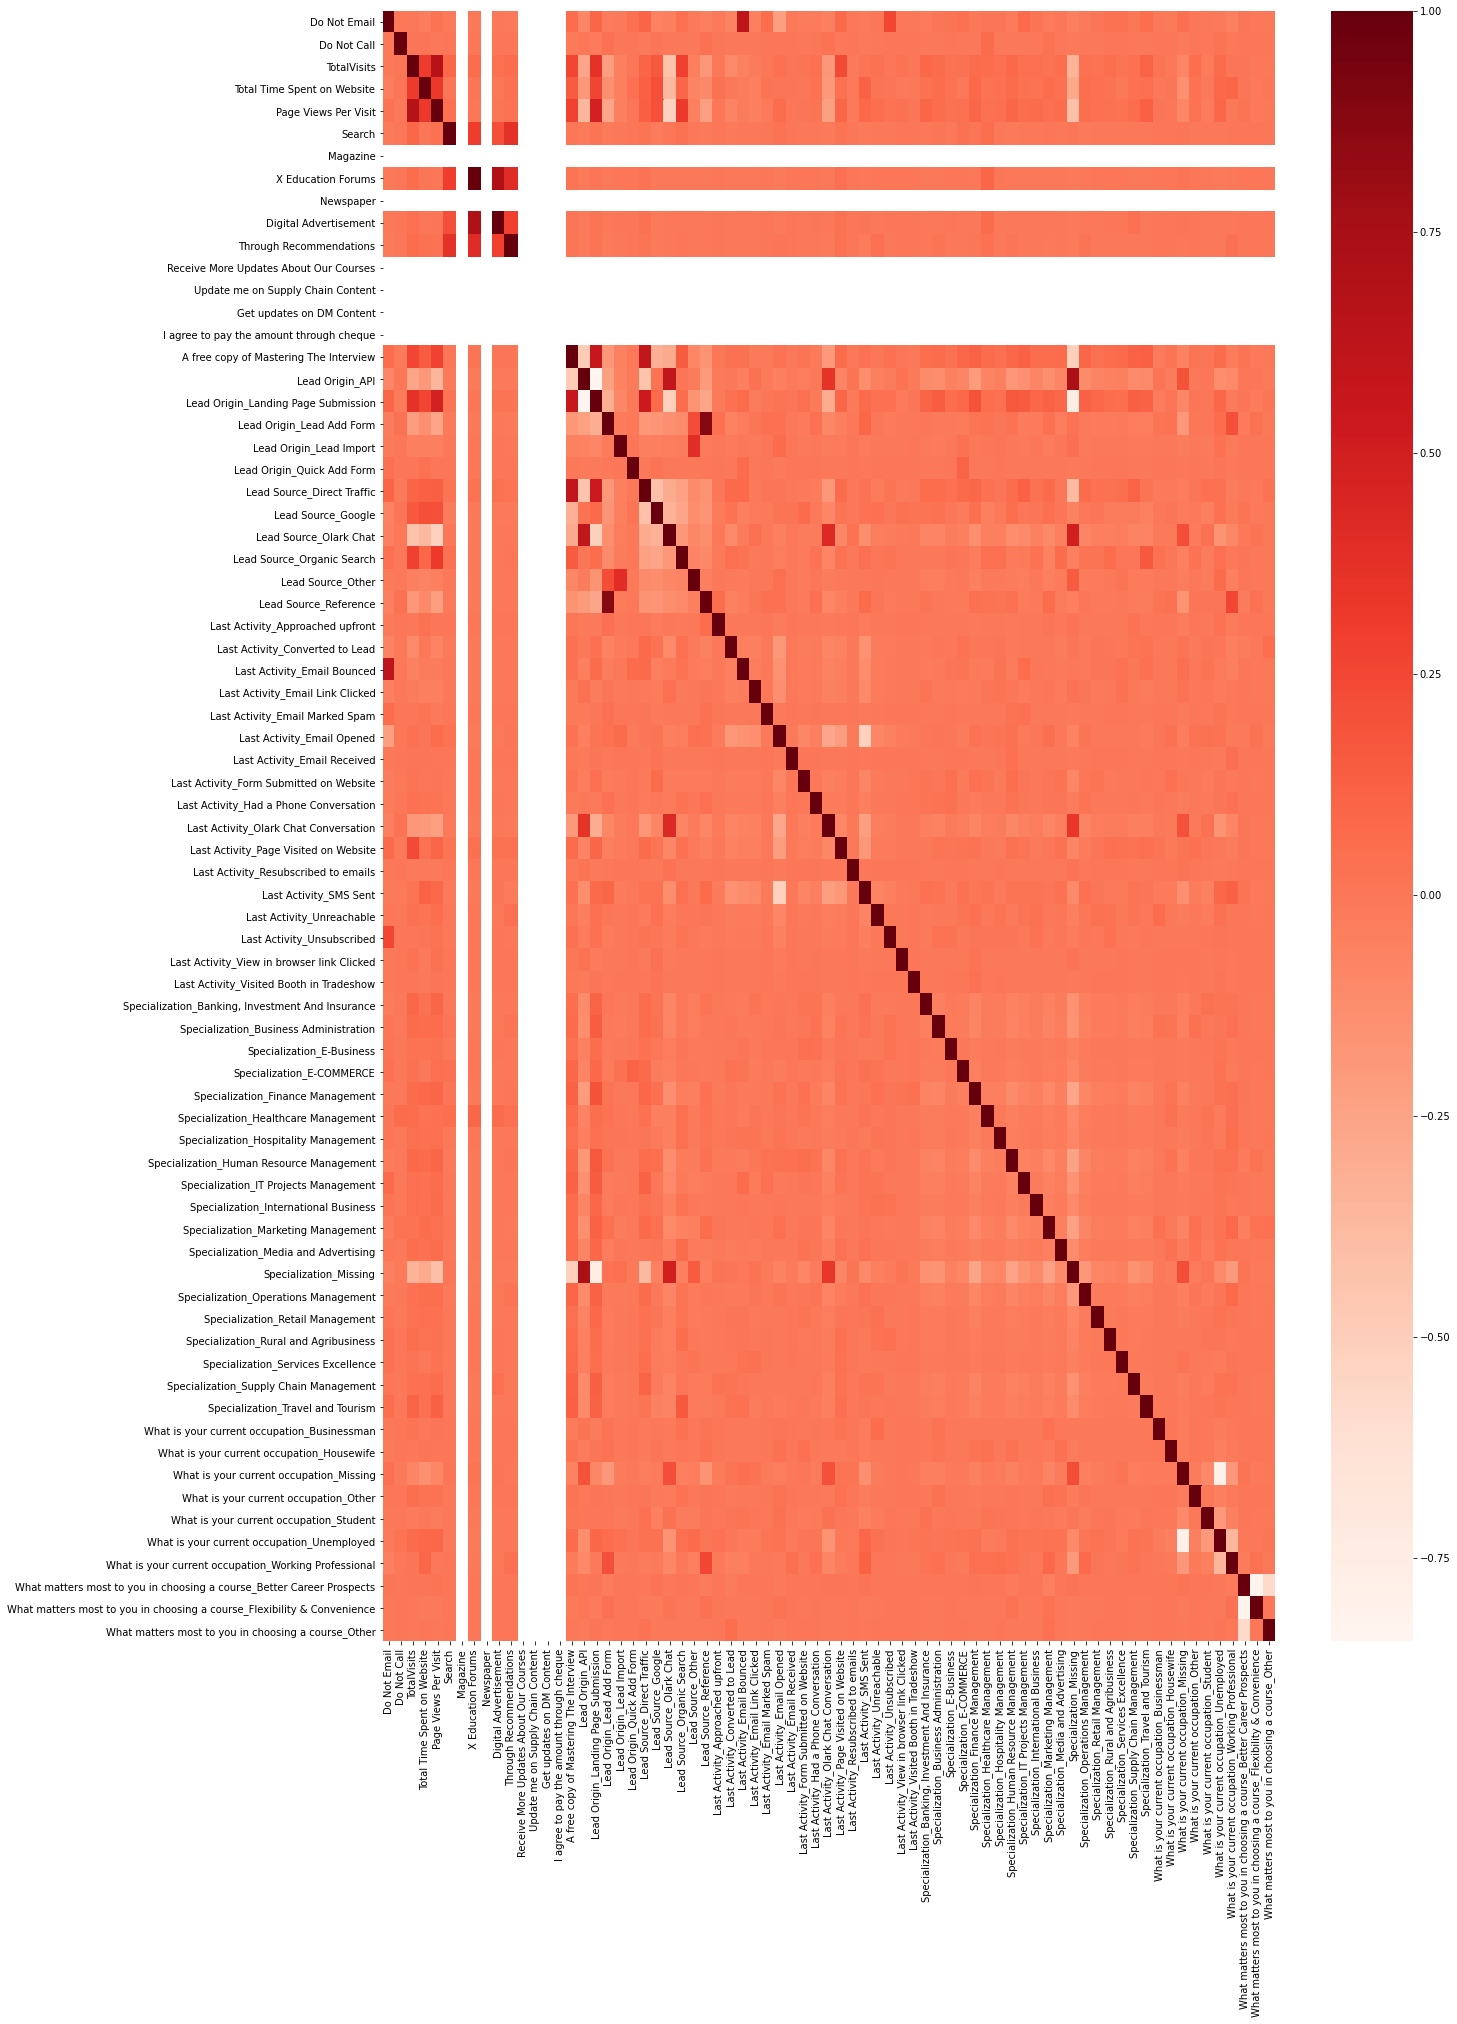

In [74]:
# Firstly lets check the correlation among all the independent varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(),cmap="Reds")
plt.show()

<b><font color="brown">Inference:- </font> </b><br></br>
<font color="blue">
- We could see that 'Last Activity_Email Bounced' and 'Do Not Email' are highly correlated.

<br></br> <b>Hence we will be removing one of the variable</b></font>

In [75]:
# Removing the Last Activity_Email Bounced as it is highly correlated with Do Not Email.
X_train.drop('Last Activity_Email Bounced',axis=1,inplace=True)
X_train.shape

(6463, 72)

In [76]:
#lets have a check on the dataset before modelling
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,...,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
4804,0,0,0.0000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2649,1,0,0.0625,0.014523,0.083333,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9119,0,0,0.0625,0.334830,0.083333,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3067,0,0,0.1875,0.105096,0.250000,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8466,0,0,0.0625,0.695273,0.083333,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [77]:
# # lets have a check on the dataset before modelling
# # We could see there is a index by default, hence we reset the index
# X_train.reset_index(inplace=True)

# # Lets drop the newly created column called index
# X_train.drop('index',axis=1,inplace=True)

# #Lets check the dataset now
# X_train.head()

## 4.2 Model Building

### <font color="dark-pink">We will be taking Hybrid approach (Automated + Manual) for Feature selection</font>

### 4.2.1 Automated approach

In [78]:
# Lets create an object of LogisticRegression 
logreg = LogisticRegression()

# Running RFE with 16 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [79]:
# Features that have been selected by RFE
pd.DataFrame(zip(X_train.columns, rfe.support_, rfe.ranking_), columns = ['Columns', 'Support', 'Ranking'])[rfe.support_]

,Columns,Support,Ranking
0,Do Not Email,True,1
2,TotalVisits,True,1
3,Total Time Spent on Website,True,1
4,Page Views Per Visit,True,1
18,Lead Origin_Lead Add Form,True,1
23,Lead Source_Olark Chat,True,1
27,Last Activity_Approached upfront,True,1
28,Last Activity_Converted to Lead,True,1
34,Last Activity_Had a Phone Conversation,True,1
35,Last Activity_Olark Chat Conversation,True,1


#### Now we are left with 15 features left out of 73 features. Lets do the manual elimination now

In [80]:
# Lets take all the columns selected by RFE in the variable 'cols'
columns = X_train.columns[rfe.support_]
columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Approached upfront',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Missing',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [81]:
# Select columns selected by RFE
X_train = X_train[columns]
X_train

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Working Professional
4804,0,0.00000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0
2649,1,0.06250,0.014523,0.083333,0,0,0,0,0,0,0,1,0,1,0
9119,0,0.06250,0.334830,0.083333,0,0,0,0,0,0,0,0,0,0,0
3067,0,0.18750,0.105096,0.250000,0,0,0,0,0,0,0,0,0,0,0
8466,0,0.06250,0.695273,0.083333,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,0,0.12500,0.723528,0.166667,0,0,0,0,0,0,0,0,0,0,0
5193,0,0.62500,0.358331,0.104167,0,0,0,0,0,0,0,0,0,1,0
5393,0,0.15625,0.365197,0.208333,0,0,0,0,0,0,1,0,0,0,0
860,0,0.09375,0.078690,0.125000,0,0,0,0,0,0,0,0,0,0,0


### 4.2.2 Manual approach

##### Creating a functions "model_build" for creation of model and "vif_values" for calculting the VIF of each feature variables

### <font color="Violet">Model 1</font>

In [82]:
# creating 1st model

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.9
Date:                Mon, 11 Apr 2022   Deviance:                       5273.8
Time:                        22:19:02   Pearson chi2:                 7.39e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0980      0.102    -20.549      0.000      -2.298      -1.898
Do Not Email                                            -1.4853      0.167     -8.890      0.000      -1.813      -1.158
TotalVisits                                              2.0751      0.415      5.003      0.000       1.262       2.888
Total Time Spent on Website                              4.6769      0.168     27.784      0.000       4.347       5.007
Page Views Per Visit                                    -2.3146      0.582     -3.974      0.000      -3.456      -1.173
Lead Origin_Lead Add Form                                3.4649      0.188     18.426      0.000       3.096       3.833
Lead Source_Olark Chat                                   1.3413      0.124     10.842      0.000       1.099       1.584
Last Activity_Approached upfront                        22.4888   2.66e+04      0.001      0.999   -5.22e+04    5.22e+04
Last Activity_Converted to Lead                         -1.0996      0.213     -5.164      0.000      -1.517      -0.682
Last Activity_Had a Phone Conversation                   1.2855      0.587      2.190      0.029       0.135       2.436
Last Activity_Olark Chat Conversation                   -1.3240      0.166     -7.995      0.000      -1.649      -0.999
Last Activity_SMS Sent                                   1.3188      0.075     17.490      0.000       1.171       1.467
Last Activity_Unsubscribed                               1.3584      0.489      2.779      0.005       0.400       2.317
What is your current occupation_Housewife               23.9052   2.56e+04      0.001      0.999   -5.02e+04    5.03e+04
What is your current occupation_Missing                 -1.2912      0.088    -14.735      0.000      -1.463      -1.119
What is your current occupation_Working Professional     2.2810      0.174     13.092      0.000       1.939       2.622
========================================================================================================================
"""

In [83]:
# VIF calculation

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.19
1,TotalVisits,3.64
2,Total Time Spent on Website,1.98
5,Lead Source_Olark Chat,1.56
10,Last Activity_SMS Sent,1.49
13,What is your current occupation_Missing,1.49
9,Last Activity_Olark Chat Conversation,1.43
14,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.15
4,Lead Origin_Lead Add Form,1.14


#### <font color="red">As 'What is your current occupation_Housewife' has high p value (insignificant) we will drop that column and proceed with others</font>

### <font color="Violet">Model 2</font>

In [84]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [85]:
# creating 2nd model

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.6
Date:                Mon, 11 Apr 2022   Deviance:                       5285.3
Time:                        22:19:03   Pearson chi2:                 7.39e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0841      0.102    -20.465      0.000      -2.284      -1.884
Do Not Email                                            -1.4893      0.167     -8.917      0.000      -1.817      -1.162
TotalVisits                                              2.0536      0.414      4.954      0.000       1.241       2.866
Total Time Spent on Website                              4.6746      0.168     27.797      0.000       4.345       5.004
Page Views Per Visit                                    -2.3205      0.582     -3.986      0.000      -3.461      -1.180
Lead Origin_Lead Add Form                                3.4611      0.188     18.431      0.000       3.093       3.829
Lead Source_Olark Chat                                   1.3323      0.124     10.783      0.000       1.090       1.575
Last Activity_Approached upfront                        21.4819   1.61e+04      0.001      0.999   -3.16e+04    3.17e+04
Last Activity_Converted to Lead                         -1.1097      0.213     -5.213      0.000      -1.527      -0.692
Last Activity_Had a Phone Conversation                   1.2785      0.587      2.178      0.029       0.128       2.429
Last Activity_Olark Chat Conversation                   -1.3286      0.166     -8.024      0.000      -1.653      -1.004
Last Activity_SMS Sent                                   1.3114      0.075     17.410      0.000       1.164       1.459
Last Activity_Unsubscribed                               1.3540      0.489      2.770      0.006       0.396       2.312
What is your current occupation_Missing                 -1.2954      0.088    -14.791      0.000      -1.467      -1.124
What is your current occupation_Working Professional     2.2750      0.174     13.061      0.000       1.934       2.616
========================================================================================================================
"""

In [86]:
# VIF calculation

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.19
1,TotalVisits,3.64
2,Total Time Spent on Website,1.98
5,Lead Source_Olark Chat,1.56
10,Last Activity_SMS Sent,1.49
12,What is your current occupation_Missing,1.49
9,Last Activity_Olark Chat Conversation,1.43
13,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.15
4,Lead Origin_Lead Add Form,1.14


#### <font color="red">As 'Last Activity_Approached upfront' has high p value (insignificant) we will drop that column and proceed with others</font>

### <font color="Violet">Model 3</font>

In [87]:
X_train.drop('Last Activity_Approached upfront', axis = 1, inplace = True)

In [88]:
# creating 3rd model

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.5
Date:                Mon, 11 Apr 2022   Deviance:                       5289.1
Time:                        22:19:03   Pearson chi2:                 7.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0836      0.102    -20.464      0.000      -2.283      -1.884
Do Not Email                                            -1.4909      0.167     -8.926      0.000      -1.818      -1.164
TotalVisits                                              2.0474      0.415      4.939      0.000       1.235       2.860
Total Time Spent on Website                              4.6809      0.168     27.844      0.000       4.351       5.010
Page Views Per Visit                                    -2.3121      0.582     -3.972      0.000      -3.453      -1.171
Lead Origin_Lead Add Form                                3.4640      0.188     18.460      0.000       3.096       3.832
Lead Source_Olark Chat                                   1.3385      0.124     10.838      0.000       1.096       1.581
Last Activity_Converted to Lead                         -1.1121      0.213     -5.223      0.000      -1.529      -0.695
Last Activity_Had a Phone Conversation                   1.2767      0.587      2.175      0.030       0.126       2.427
Last Activity_Olark Chat Conversation                   -1.3331      0.166     -8.052      0.000      -1.658      -1.009
Last Activity_SMS Sent                                   1.3089      0.075     17.380      0.000       1.161       1.457
Last Activity_Unsubscribed                               1.3533      0.489      2.768      0.006       0.395       2.311
What is your current occupation_Missing                 -1.2980      0.088    -14.821      0.000      -1.470      -1.126
What is your current occupation_Working Professional     2.2734      0.174     13.051      0.000       1.932       2.615
========================================================================================================================
"""

In [89]:
# VIF calculation

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.19
1,TotalVisits,3.64
2,Total Time Spent on Website,1.98
5,Lead Source_Olark Chat,1.56
11,What is your current occupation_Missing,1.49
9,Last Activity_SMS Sent,1.48
8,Last Activity_Olark Chat Conversation,1.43
12,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.15
4,Lead Origin_Lead Add Form,1.13


<b><font color="brown">Inference:- </font> </b><br></br>
<font color="blue">
- As we can see that, all the p-values ar below 0.05 and VIF < 5. Hence the model is good to go.
- Lets now see the columns chosen</font>

In [90]:
res.predict(X_train_sm).describe()

count    6463.000000
mean        0.381092
std         0.324727
min         0.003077
25%         0.110702
50%         0.296685
75%         0.661980
max         0.999388
dtype: float64

In [91]:
# Lets check the columns for the final model
columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Approached upfront',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Missing',
       'What is your current occupation_Working Professional'],
      dtype='object')

## 4.3 Making Predictions

In [92]:
# Predict the probabilities on the train set
y_train_pred = res.predict(X_train_sm)

# Creating a new dataset and saving actual and predicted probability values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred})

y_train_pred_final

,Converted,Converted_probability
4804,1,0.799063
2649,0,0.028862
9119,0,0.358703
3067,0,0.143592
8466,0,0.917973
...,...,...
5739,0,0.763821
5193,0,0.339509
5393,1,0.684169
860,0,0.140359


In [93]:
# Lets check the range of predicted value compared with actual
y_train_pred_final.describe()

,Converted,Converted_probability
count,6463.000000,6463.000000
mean,0.381092,0.381092
std,0.485693,0.324727
min,0.000000,0.003077
25%,0.000000,0.110702
50%,0.000000,0.296685
75%,1.000000,0.661980
max,1.000000,0.999388


#### Let's take a cutoff of 0.5 first and check

In [94]:
# Substituting 0 or 1 with the cut off as 0.5 
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Predicted
4804,1,0.799063,1
2649,0,0.028862,0
9119,0,0.358703,1
3067,0,0.143592,0
8466,0,0.917973,1


# 5. Model Evaluation

## 5.1 Making Predictions

In [95]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3243,  757],
       [ 480, 1983]], dtype=int64)

<br></br><table align = "left">
    <tr>
        <td><b>Predicted</b></td>
    <td>not churn</td>
    <td>churn</td>
    </tr>
    <tr>
        <td><b>Actual</b></td>
    </tr>
    <tr>
        <td>not_churn</td>
        <td>3243</td>
        <td>757</td>
    </tr>
        <tr>
        <td>churn</td>
        <td>480</td>
        <td>1983</td>
    </tr>
</table>
<br></br>

In [96]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8086028160297075

__That's around 80% accuracy with is a very good value__

In [97]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [98]:
# Calculating the sensitivity
TP/(TP+FN)

0.805115712545676

In [99]:
# Calculating the specificity
TN/(TN+FP)

0.81075

__With the current cut off as 0.5 we have accuracy, sensitivity and specificity of around 80%.__

## 5.2 Optimise the Cutoff using (ROC Curve) [Method 1]

##### The cutoff that was selected previously was taken randomly as 0.5 as default. Lets now calculate the optimal cutoff point using the ROC curve

### 5.2.1 ROC Curve

In [100]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative (TN)]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [101]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )

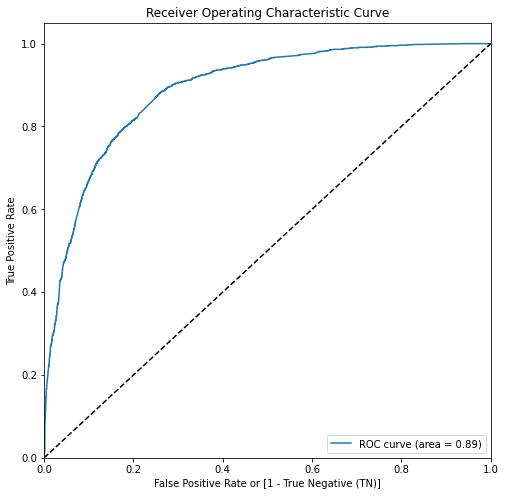

In [102]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

__The area under ROC curve is 0.89 which is a very good value.__

In [103]:
# Creating columns with different probability cutoffs [0 - 0.9] 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4804,1,0.799063,1,1,1,1,1,1,1,1,1,0,0
2649,0,0.028862,0,1,0,0,0,0,0,0,0,0,0
9119,0,0.358703,1,1,1,1,1,0,0,0,0,0,0
3067,0,0.143592,0,1,1,0,0,0,0,0,0,0,0
8466,0,0.917973,1,1,1,1,1,1,1,1,1,1,1


In [104]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

num_range = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num_range:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.381092,1.000000,0.00000
0.1,0.1,0.598174,0.984166,0.36050
0.2,0.2,0.762494,0.916768,0.66750
0.3,0.3,0.793440,0.882663,0.73850
0.4,0.4,0.814173,0.774665,0.83850
0.5,0.5,0.816494,0.704425,0.88550
0.6,0.6,0.807210,0.634998,0.91325
0.7,0.7,0.780752,0.516443,0.94350
0.8,0.8,0.742999,0.377588,0.96800
0.9,0.9,0.711125,0.264312,0.98625


<Figure size 1080x720 with 0 Axes>

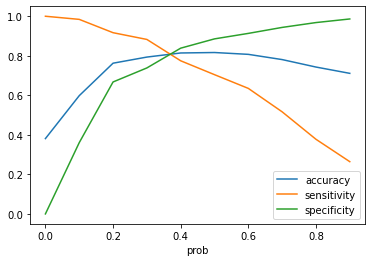

In [105]:
# Plotting the tradeoff curve
plt.figure(figsize=(15,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

__<font color="red">From the graph it is visible that the optimal cut off is at appx. 0.38. The cutoff is taken as intersecion point of accuracy, sensitivity and specificity curves</font>__

In [106]:
# Predicting the values using the new cutoff point
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4804,1,0.799063,1,1,1,1,1,1,1,1,1,0,0,1
2649,0,0.028862,0,1,0,0,0,0,0,0,0,0,0,0
9119,0,0.358703,1,1,1,1,1,0,0,0,0,0,0,0
3067,0,0.143592,0,1,1,0,0,0,0,0,0,0,0,0
8466,0,0.917973,1,1,1,1,1,1,1,1,1,1,1,1


In [107]:
# Check the overall accuracy again with new cutoff
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8130898963329724

In [108]:
# Creating confusion matrix  again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3318,  682],
       [ 526, 1937]], dtype=int64)

In [109]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [110]:
# Calculating the sensitivity
TP/(TP+FN)

0.7864393016646366

In [111]:
# Calculating the specificity
TN/(TN+FP)

0.8295

__With the current cut off as 0.38 we have accuracy and specificity and sensitivity is around 80%__

### 5.2.2 Predictions on Test dataset

In [112]:
# Checking the test dataset once
X_test

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,...,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
3687,0,0,0.0,0.00,0.00,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3013,0,0,8.0,13.03,2.67,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8399,0,0,3.0,0.23,1.00,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7361,0,0,2.0,1.02,2.00,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6253,0,0,4.0,0.80,4.00,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274,0,0,6.0,4.05,6.00,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5233,0,0,4.0,29.50,4.00,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
478,0,0,0.0,0.00,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1352,0,0,6.0,23.47,3.00,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [113]:
# Substituting all the columns in the final train model
columns = X_train.columns
columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'What is your current occupation_Missing',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [114]:
# Scaling the three numeric features for test dataset also
vars_num_test = ["Total Time Spent on Website","TotalVisits","Page Views Per Visit"]

# Creating Minmaxscaler object again
# scalar = MinMaxScaler()
# Fit the test dataset
X_test[vars_num_test] = scalar.transform(X_test[vars_num_test])

In [115]:
# Select the columns in X_train for X_test as well
X_test = X_test[columns]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[columns])
X_test_sm
X_test_sm.shape
# X_test

(2771, 14)

In [116]:
# Test dataset after scaling
X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Missing,What is your current occupation_Working Professional
3687,1.0,0,0.00000,0.000000,0.000000,0,1,0,0,0,1,0,0,0
3013,1.0,0,0.25000,0.344072,0.111250,0,0,0,0,0,0,0,1,0
8399,1.0,0,0.09375,0.006073,0.041667,0,0,0,0,0,0,0,0,0
7361,1.0,0,0.06250,0.026934,0.083333,0,0,0,0,0,1,0,0,0
6253,1.0,0,0.12500,0.021125,0.166667,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274,1.0,0,0.18750,0.106945,0.250000,0,0,0,0,0,0,0,0,0
5233,1.0,0,0.12500,0.778981,0.166667,0,0,0,0,0,0,0,0,0
478,1.0,0,0.00000,0.000000,0.000000,0,1,0,0,1,0,0,1,0
1352,1.0,0,0.18750,0.619752,0.125000,0,0,0,0,0,0,0,0,0


In [117]:
# Adding a constant value to test dataset for fitting the last model (This is done because the model created by statsmodel
# expects a constant value as it was given for the creation of model)
# X_test_sm = sm.add_constant(X_test[columns])

# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to dataframe
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Lets append y_test_df and y_pred_df
y_test_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_test_pred_final= y_test_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_test_pred_final.head()

,Converted,Conversion_Probability
0,1,0.637337
1,0,0.179996
2,1,0.123516
3,1,0.328869
4,0,0.031919


In [118]:
# Lets check the range of values of predicted conversions
y_test_pred_final.describe()

,Converted,Conversion_Probability
count,2771.000000,2771.000000
mean,0.395886,0.390694
std,0.489128,0.327610
min,0.000000,0.004001
25%,0.000000,0.111233
50%,0.000000,0.315470
75%,1.000000,0.685069
max,1.000000,0.999148


In [119]:
# Making prediction using cut off 0.38
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.38 else 0)
y_test_pred_final

,Converted,Conversion_Probability,final_predicted
0,1,0.637337,1
1,0,0.179996,0
2,1,0.123516,0
3,1,0.328869,0
4,0,0.031919,0
...,...,...,...
2766,0,0.144659,0
2767,1,0.807417,1
2768,0,0.033048,0
2769,1,0.713466,1


In [120]:
# Check the overall accuracy
metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.final_predicted)

0.8054853843377842

In [121]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.final_predicted )
confusion2

array([[1374,  300],
       [ 239,  858]], dtype=int64)

In [122]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [123]:
# Calculating the sensitivity
TP/(TP+FN)

0.7821330902461258

In [124]:
# Calculating the specificity
TN/(TN+FP)

0.8207885304659498

__With the current cut off as 0.38 we have accuracy, sensitivity and specificity is also around 80%__

## 5.3 Optimising the Cutoff point (Precision Curve) [Method 2]

### 5.3.1 Precision-Recall Calculation

In [125]:
# Lets first create the confusion matrics again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3243,  757],
       [ 480, 1983]], dtype=int64)

In [126]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7237226277372263

In [127]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.805115712545676

In [128]:
y_train_pred_final["Converted_probability"]

4804    0.799063
2649    0.028862
9119    0.358703
3067    0.143592
8466    0.917973
          ...   
5739    0.763821
5193    0.339509
5393    0.684169
860     0.140359
7276    0.117737
Name: Converted_probability, Length: 6463, dtype: float64

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final["Converted_probability"])

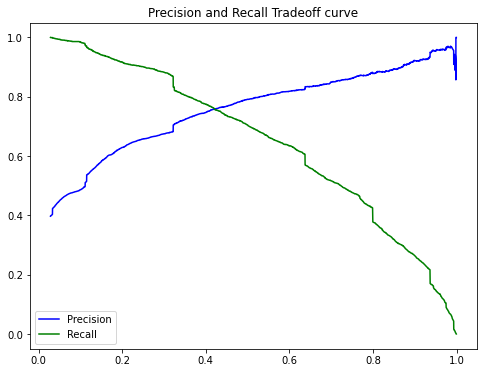

In [130]:
plt.figure(figsize=(8,6))
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")
plt.legend(["Precision","Recall"])
plt.title("Precision and Recall Tradeoff curve")
plt.show()

__<font color="red">From the graph it is visible that the optimal cut off is at 0.42. The cutoff is taken as intersecion point of Precision and Recall curves</font>__

In [131]:
# Lets predict the values based on the new cutoff point (Precision-recall curve)
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4804,1,0.799063,1,1,1,1,1,1,1,1,1,0,0,1
2649,0,0.028862,0,1,0,0,0,0,0,0,0,0,0,0
9119,0,0.358703,1,1,1,1,1,0,0,0,0,0,0,0
3067,0,0.143592,0,1,1,0,0,0,0,0,0,0,0,0
8466,0,0.917973,1,1,1,1,1,1,1,1,1,1,1,1


In [132]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8168033421011914

In [133]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3406,  594],
       [ 590, 1873]], dtype=int64)

In [134]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [135]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7592217267936765

In [136]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.76045473000406

__With the current cut off as 0.42 we have Precision and Recall around 76%__

### 5.3.2 Predictions on Test dataset

In [137]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_test_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_test_pred_final= y_test_pred_final.rename(columns = {0 : 'Conversion_Probabilty'})
y_test_pred_final.head()

,Converted,Conversion_Probabilty
0,1,0.637337
1,0,0.179996
2,1,0.123516
3,1,0.328869
4,0,0.031919


In [138]:
y_test_pred_final.describe()

,Converted,Conversion_Probabilty
count,2771.000000,2771.000000
mean,0.395886,0.390694
std,0.489128,0.327610
min,0.000000,0.004001
25%,0.000000,0.111233
50%,0.000000,0.315470
75%,1.000000,0.685069
max,1.000000,0.999148


In [139]:
# Making prediction using cut off 0.42
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Probabilty.map(lambda x: 1 if x > 0.42 else 0)
y_test_pred_final.head()

,Converted,Conversion_Probabilty,final_predicted
0,1,0.637337,1
1,0,0.179996,0
2,1,0.123516,0
3,1,0.328869,0
4,0,0.031919,0


In [140]:
# Check the overall accuracy
metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.final_predicted)

0.8098159509202454

In [141]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.final_predicted )
confusion2

array([[1411,  263],
       [ 264,  833]], dtype=int64)

In [142]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [143]:
# Precision = TP / TP + FP
print("Precision --> ",TP / (TP + FP))

#Recall = TP / TP + FN
print("Recall -->    ", TP / (TP + FN))

Precision -->  0.760036496350365
Recall -->     0.7593436645396536


__With the current cut off as 0.42 we have Precision and Recall are around 76% very near to train dataset__

## 5.4 Calculating the Lead score

In [144]:
# Lets calculate the Leadscore of test dataset
y_test_pred_final["Lead_score_test"] = round(y_test_pred_final["Conversion_Probabilty"] * 100, 2)
y_test_pred_final

,Converted,Conversion_Probabilty,final_predicted,Lead_score_test
0,1,0.637337,1,63.73
1,0,0.179996,0,18.00
2,1,0.123516,0,12.35
3,1,0.328869,0,32.89
4,0,0.031919,0,3.19
...,...,...,...,...
2766,0,0.144659,0,14.47
2767,1,0.807417,1,80.74
2768,0,0.033048,0,3.30
2769,1,0.713466,1,71.35


In [145]:
# Lets check the lead score of test (unseen) dataset
y_test_pred_final["Lead_score_test"].head()

# Lets create a score matrix
Lead_Score = pd.DataFrame(y_test_pred_final["Lead_score_test"]) 
Lead_Score.head()

,Lead_score_test
0,63.73
1,18.00
2,12.35
3,32.89
4,3.19


___________________________________________________________________________________________________________________________


# <font color="blue">Summary</font>

X Education should focus on the following to improve their conversion rates to target of 80%
- Leads who spend a good amount of time on the website
- Leads who have responded to phone calls, emails 
- Leads who are working professionals
